In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display

In [56]:
# this command is used to load the dataset 
df = pd.read_csv('movie_data.csv')

In [57]:
# used to set up training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [58]:
# vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(train_df['Genre'].fillna(''))

In [59]:
# cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [76]:
# Used to select a random movie with the rating being atleast a 6.0 or higher, this is also the how it validates that the movie meets specified criteria.
def select_random_movie(genre):
    genre_movies = train_df[(train_df['Genre'].str.contains(genre, case=False, na=False)) & (train_df['Rating'] >= 6.0)]
    if genre_movies.empty:
        return "Movie with rating 6.0 or higher is unavailable."
    random_movie = genre_movies.sample(n=1)
    return random_movie.iloc[0]['Movie']

In [77]:
# recommend similar movies to the main one chosen
def recommend_movies(title, cosine_sim=cosine_sim):
    if title not in train_df['Movie'].values:
        return ["Movie not in training set"]
    idx = train_df[train_df['Movie'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #gets 10 similar movies
    sim_scores = sim_scores[1:11]  
    movie_indices = [i[0] for i in sim_scores]
    
    # Filter recommended movies by rating >= 6.0
    recommended_movies = train_df.iloc[movie_indices].loc[train_df['Rating'] >= 6.0]['Movie'].tolist()
    
    random.shuffle(recommended_movies)  # Shuffle recommended movies within the same genre
    return recommended_movies[:3]  # Return the first 3 randomized movies

In [78]:
# creates dropdown list containing the genres
genre_dropdown = widgets.Dropdown(
    options=['Action', 'Biography', 'Adventure', 'Western', 'Drama', 'Crime', 'Comedy', 
             'Horror', 'Mystery', 'Film-Noir', 'Fantasy', 'Musical'],
    description='Genre:'
)

In [82]:
# creates the button to click for the movie recommendation, once the genre is chosen and the button is pressed it will recommend a movie and give suggestions.
recommend_button = widgets.Button(description='Recommend Movies')

def on_recommend_button_click(b):
    genre = genre_dropdown.value
    movie = select_random_movie(genre)
    if movie == "Movie that has a rating of 6.0 or higher is not available.":
        print(movie)
    else:
        recommended_movies = recommend_movies(movie, cosine_sim)
        print(f"Main movie: '{movie}'")
        print(f"\nRandomized movies similar to '{movie}' in genre '{genre}' with rating of 6.0 or higher:")
        for m in recommended_movies:
            print(f"- {m}")

recommend_button.on_click(on_recommend_button_click)
display(genre_dropdown, recommend_button)

Dropdown(description='Genre:', index=4, options=('Action', 'Biography', 'Adventure', 'Western', 'Drama', 'Crim…

Button(description='Recommend Movies', style=ButtonStyle())

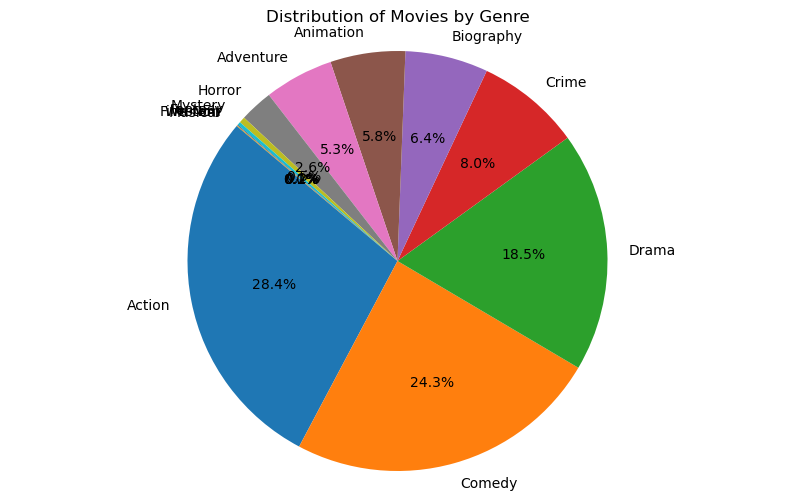

In [80]:
# pie chart for amount of movies per genre
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Genre')
plt.axis('equal')
plt.show()


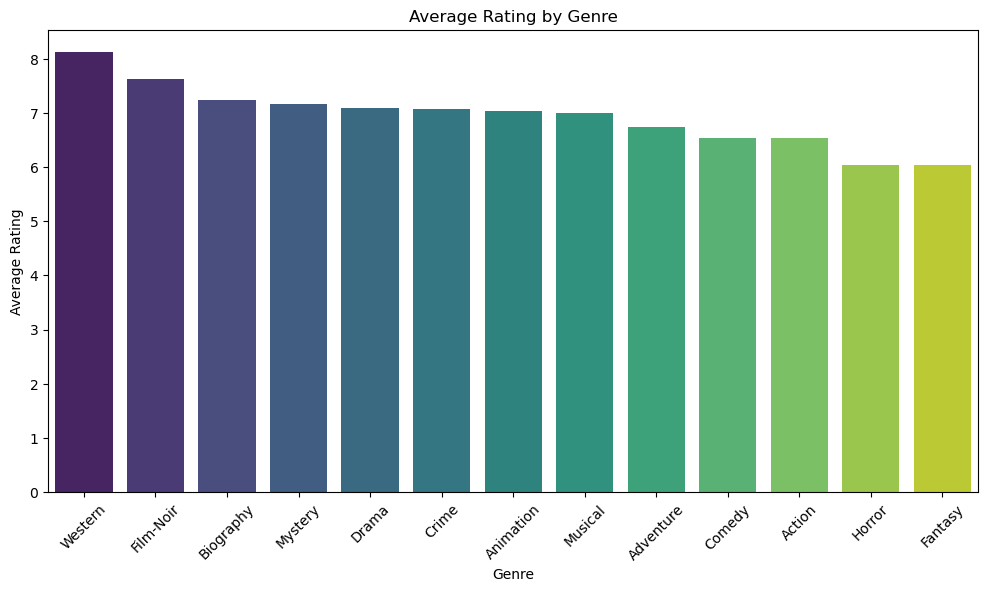

In [81]:
# bar chart comparing the ratings by genres
genre_ratings = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

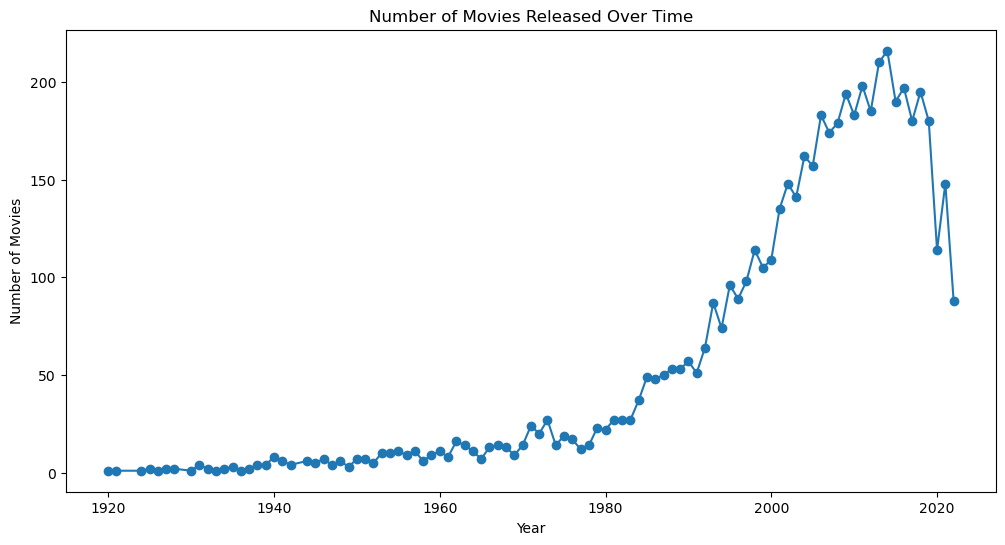

In [43]:
# line chart for a timeline of movies released by year
release_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts.values, marker='o')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

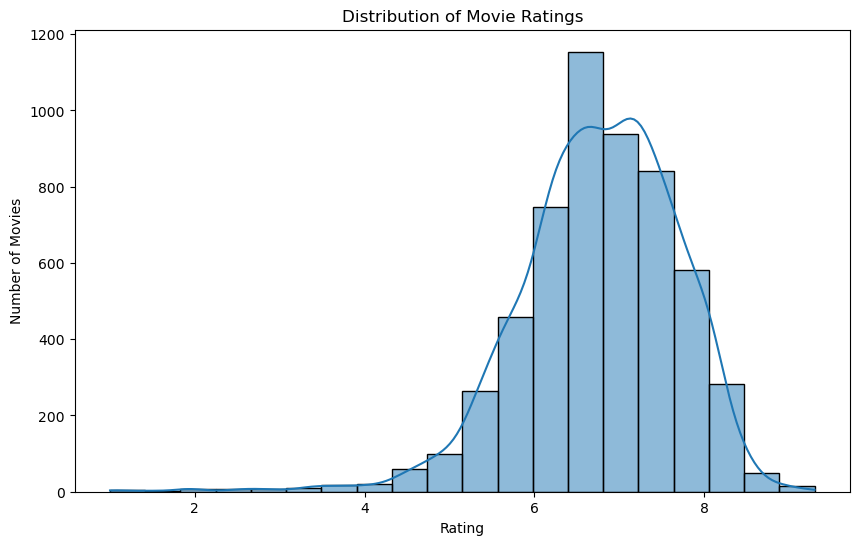

In [44]:
# shows the movies and distrbution of the ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()